# <center> Раздел 2. Модуль 5. Визуализация данных. Задача для закрепления знаний 

In [2]:

import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## <center> Столбцы таблицы:

* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# churn_data = churn_data.drop(['RowNumber'], axis=1)

In [5]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [7]:
plt.style.use('default')

## <center> Задания

#### Задание 9.1

* Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [8]:
exited_combinations = churn_data['Exited'].value_counts()
fig = px.pie(
    values=exited_combinations, 
    title='Combinations of exited clients',
    hole=0.5,
    width=500,
    height=500,
    names=exited_combinations.index
)
fig.update_layout(
    title_x=0.5,
    legend_orientation="v",
    annotations=[dict(text='Cтатус лояльности: <br>1 — ушедший клиент,<br>0 — лояльный клиент', x=0.5, y=0.5, font_size=10, showarrow=False)])
fig.show();

#### Выводы по графику: 
* Соотношение ушедших и лояльных клиентов составляет 4 к 1 или 79.6 % к 20.4 %. Отток клиентов банка в 4 раза меньше оставшися клиентов;
* Требуется вести постоянный сбор обратной связи и анализ лояльности клиентов.
* Требуется выявить / проанализировать причины оттока клиентов; 
* Требуется выявить клиентов, склонных к оттоку и реализовать меры по их удержанию для снижения общего соотношения клиентов по лояльности;
* Требуется системная работа по совершенствованию клиентских процессов и построению отношений с клиентами.


#### Задание 9.2
* Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [9]:
group_92 = churn_data['Balance'] > 2500
group_of_balanceofclients = churn_data[group_92]
display(group_of_balanceofclients)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
#строим график
fig = px.scatter(
    data_frame=group_of_balanceofclients, #датафрейм 
    x = 'Balance', #ось абсцисс
    y = 'EstimatedSalary', #ось ординат
    color='Geography', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=500,
    height=500,
    title='Распределение баланса пользователей,<br>у которых на счету больше 2 500 долларов'
)

#отображаем его
fig.show()

#### Выводы по графику: 
* Зависимости относительно Баланса сохраняются для всех трех стран (Германии, Франции, Испании);
* Все клиенты с балансом на счету более 2500 долларов имеют кредитные карты и имеют статус активных клиентов;
* Чем больше размер предполагаемой заработной платы тем диапазон баланса шире;
* Чем больше продуктов банка у клиентов тем распределение диапазона баланса уже.  


#### Задание 9.3
* Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [12]:
#fig = plt.figure(figsize=(10, 7))
#boxplot = sns.boxplot(
#    data=churn_data,
#    y='Exited',
#    x='Balance',
#    orient='h',
#    width=0.7
#)
#boxplot.set_title('Респределение баланса по лояльности клиентов');
#boxplot.set_xlabel('Баланс клиентов, $');
#boxplot.set_ylabel('Вид лояльности (0 - лояльный, 1 - ушедший)');
#boxplot.grid()

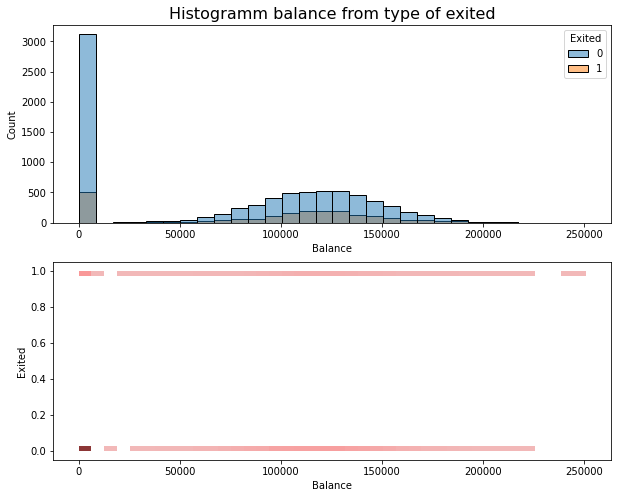

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_data,
    x='Balance',
    hue='Exited',
    bins=30,
    kde=False,
    ax=axes[0]
);
axes[0].set_title('Histogramm balance from type of exited', fontsize=16)
sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=40,
    color='red',
    ax=axes[1]
);

#### Выводы по графику: 
* Баланс ушедших клиентов в основном нулевой. Это является предположительной причиной их ухода.

#### Задание 9.4
* Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

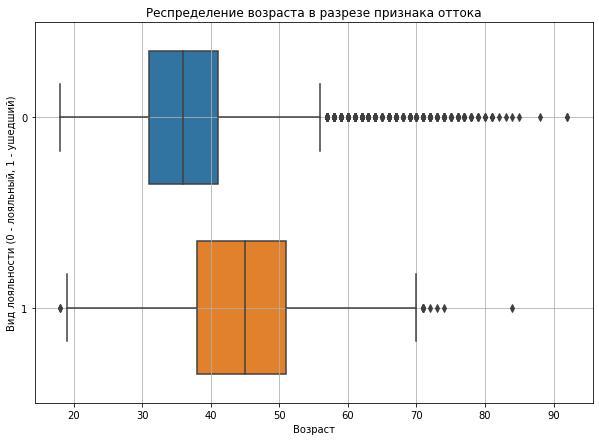

In [14]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.7
)
boxplot.set_title('Респределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Вид лояльности (0 - лояльный, 1 - ушедший)');
boxplot.grid()

#### Выводы по графику: 
* В группе лояльных больше потенциальных выбросов. 
* Банку стоит больше обратить внимание на возрастную категорию клиентов в среднем от 38 лет до 51 года. 

#### Задание 9.5
* Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

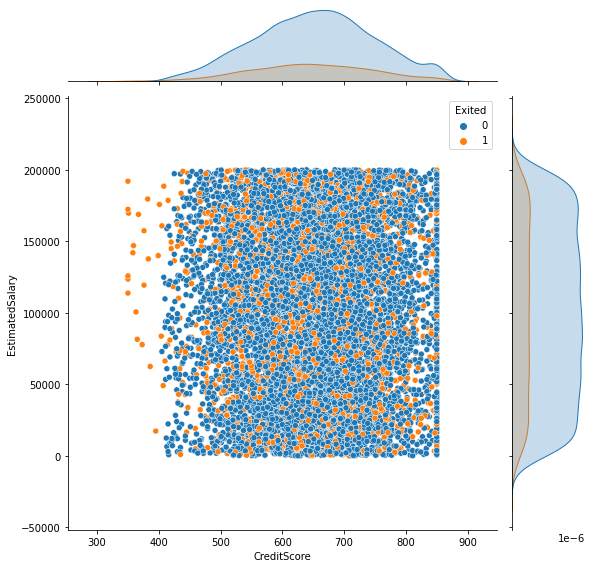

In [15]:
credit_estimatedsalary = sns.jointplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    height=8
)


#### Выводы по графику: 
* Взаимосвязи явной нет. 

#### Задание 9.6
* Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [16]:
volume_of_exited = (churn_data.groupby(by='Gender')['Exited'].sum() / churn_data.shape[0]) * 100
display(volume_of_exited)

Gender
Female    11.39
Male       8.98
Name: Exited, dtype: float64

In [17]:

fig = px.pie(
    values=volume_of_exited, 
    title='Combinations of volume whitch exited not loyal',
    hole=0.5,
    width=500,
    height=500,
    names=volume_of_exited.index
)

fig.show();

#### Выводы по графику: 
* Чаще уходят женщины. 

#### Задание 9.7
* Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [19]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
numofproducts_quant = churn_data.groupby(['NumOfProducts', 'Gender'])['Exited'].sum()
display(numofproducts_quant)

NumOfProducts  Gender
1              Female    762
               Male      647
2              Female    210
               Male      138
3              Female    129
               Male       91
4              Female     38
               Male       22
Name: Exited, dtype: int64

In [42]:
numofproducts_quant

NumOfProducts  Gender
1              Female    762
               Male      647
2              Female    210
               Male      138
3              Female    129
               Male       91
4              Female     38
               Male       22
Name: Exited, dtype: int64

In [ ]:
products_exited = churn_data.groupby(['Exited','NumOfProducts'], as_index=False)['CustomerId'].count()
display(products_exited)

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

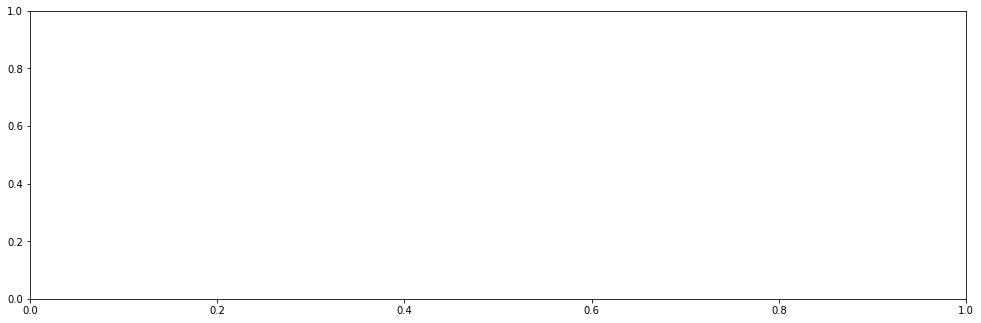

In [46]:
fig = plt.figure(figsize=(13, 4))
exited_axes = fig.add_axes([0, 0, 1, 1])
exited_axes.bar(
    x = numofproducts_quant.index,
    height = numofproducts_quant,
    );
exited_axes.set_ylabel('Число вакцинированных (2 компонент)')
exited_axes.set_title('Топ 5 стран по числу полностью привитых людей')
